We start by fetching the shape of Brandenburg from OpenStreetMap:

In [1]:
import sentinel_helpers

In [2]:
brandenburg = sentinel_helpers.search_osm('Brandenburg, Germany').iloc[:1]
brandenburg

place_id  osm_type  osm_id              display_name  place_rank  \
0  234763399  relation   62504  Brandenburg, Deutschland           8   

   category            type  importance  \
0  boundary  administrative    0.766083   

                                                icon  \
0  https://nominatim.openstreetmap.org/images/map...   

                                            geometry  
0  MULTIPOLYGON (((11.26623 53.12205, 11.26780 53...

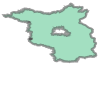

In [3]:
brandenburg.iloc[0]['geometry']

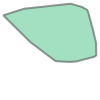

In [4]:
# let's remove the hole and simplify the shape
brandenburg_simple = brandenburg.convex_hull[0]
brandenburg_simple

We want to fetch exactly those products that help us stitch together an image of Brandenburg while not being excessively covered by clouds (see [01 Brandenburg Cover Research.ipynb]("01 Brandenburg Cover Research.ipynb") for more info).

In [5]:
from sentinelsat import SentinelAPI
from datetime import date
import datetime

In [6]:
# --------------------------------------------------------------------------#
# adjust these lines to search for pictures of the fire you want to look at #
# you should not need to changed anything below this cell                   #
# --------------------------------------------------------------------------#
end_date = date(2020,7,1)
start_date = end_date - datetime.timedelta(weeks=4)
footprint = brandenburg_simple.wkt

In [7]:
# you need to set up the ~/.netrc in order for the login to work
api = SentinelAPI(None, None)

In [8]:
products = api.query(footprint,
                     platformname='Sentinel-2',
                     processinglevel='Level-2A',
                     date=(start_date, end_date))

Querying products: 100%|██████████| 181/181 [00:01<00:00, 121.51 products/s]


In [9]:
print('Found ' + str(len(products)) + ' results')

Found 181 results


We want products with a cloud cover percentage below 50 percent covering all of Brandenburg.

In [10]:
gdf = api.to_geodataframe(products)
gdf = gdf[gdf['cloudcoverpercentage'] < 50]
gdf.head()

/opt/conda/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


title  \
eb1fec8e-d933-48c3-99f2-c2b3731dc5a1  S2A_MSIL2A_20200630T102031_N0214_R065_T33UUS_2...   
a87c7ff5-8664-4002-9258-7b1508a1de78  S2A_MSIL2A_20200630T102031_N0214_R065_T33UUT_2...   
8c3b2e01-7c8b-43d4-b3e0-1a6a376cdd65  S2A_MSIL2A_20200630T102031_N0214_R065_T33UVT_2...   
7b322eaf-f037-4b4e-a918-d477d0a052ad  S2A_MSIL2A_20200630T102031_N0214_R065_T32UQC_2...   
5c6ef9e1-8828-4d6d-8df4-7274e3b10e14  S2A_MSIL2A_20200630T102031_N0214_R065_T33UVS_2...   

                                                                                   link  \
eb1fec8e-d933-48c3-99f2-c2b3731dc5a1  https://scihub.copernicus.eu/apihub/odata/v1/P...   
a87c7ff5-8664-4002-9258-7b1508a1de78  https://scihub.copernicus.eu/apihub/odata/v1/P...   
8c3b2e01-7c8b-43d4-b3e0-1a6a376cdd65  https://scihub.copernicus.eu/apihub/odata/v1/P...   
7b322eaf-f037-4b4e-a918-d477d0a052ad  https://scihub.copernicus.eu/apihub/odata/v1/P...   
5c6ef9e1-8828-4d6d-8df4-7274e3b10e14  https://scihub.copernicus.eu/apihub/odata/v1/P...   

                                                                       link_alternative  \
eb1fec8e-d933-48c3-99f2-c2b3731dc5a1  https://scihub.copernicus.eu/apihub/odata/v1/P...   
a87c7ff5-8664-4002-9258-7b1508a1de78  https://scihub.copernicus.eu/apihub/odata/v1/P...   
8c3b2e01-7c8b-43d4-b3e0-1a6a376cdd65  https://scihub.copernicus.eu/apihub/odata/v1/P...   
7b322eaf-f037-4b4e-a918-d477d0a052ad  https://scihub.copernicus.eu/apihub/odata/v1/P...   
5c6ef9e1-8828-4d6d-8df4-7274e3b10e14  https://scihub.copernicus.eu/apihub/odata/v1/P...   

                                                                              link_icon  \
eb1fec8e-d933-48c3-99f2-c2b3731dc5a1  https://scihub.copernicus.eu/apihub/odata/v1/P...   
a87c7ff5-8664-4002-9258-7b1508a1de78  https://scihub.copernicus.eu/apihub/odata/v1/P...   
8c3b2e01-7c8b-43d4-b3e0-1a6a376cdd65  https://scihub.copernicus.eu/apihub/odata/v1/P...   
7b322eaf-f037-4b4e-a918-d477d0a052ad  https://scihub.copernicus.eu/apihub/odata/v1/P...   
5c6ef9e1-8828-4d6d-8df4-7274e3b10e14  https://scihub.copernicus.eu/apihub/odata/v1/P...   

                                                                                summary  \
eb1fec8e-d933-48c3-99f2-c2b3731dc5a1  Date: 2020-06-30T10:20:31.024Z, Instrument: MS...   
a87c7ff5-8664-4002-9258-7b1508a1de78  Date: 2020-06-30T10:20:31.024Z, Instrument: MS...   
8c3b2e01-7c8b-43d4-b3e0-1a6a376cdd65  Date: 2020-06-30T10:20:31.024Z, Instrument: MS...   
7b322eaf-f037-4b4e-a918-d477d0a052ad  Date: 2020-06-30T10:20:31.024Z, Instrument: MS...   
5c6ef9e1-8828-4d6d-8df4-7274e3b10e14  Date: 2020-06-30T10:20:31.024Z, Instrument: MS...   

                                               beginposition  \
eb1fec8e-d933-48c3-99f2-c2b3731dc5a1 2020-06-30 10:20:31.024   
a87c7ff5-8664-4002-9258-7b1508a1de78 2020-06-30 10:20:31.024   
8c3b2e01-7c8b-43d4-b3e0-1a6a376cdd65 2020-06-30 10:20:31.024   
7b322eaf-f037-4b4e-a918-d477d0a052ad 2020-06-30 10:20:31.024   
5c6ef9e1-8828-4d6d-8df4-7274e3b10e14 2020-06-30 10:20:31.024   

                                                 endposition  \
eb1fec8e-d933-48c3-99f2-c2b3731dc5a1 2020-06-30 10:20:31.024   
a87c7ff5-8664-4002-9258-7b1508a1de78 2020-06-30 10:20:31.024   
8c3b2e01-7c8b-43d4-b3e0-1a6a376cdd65 2020-06-30 10:20:31.024   
7b322eaf-f037-4b4e-a918-d477d0a052ad 2020-06-30 10:20:31.024   
5c6ef9e1-8828-4d6d-8df4-7274e3b10e14 2020-06-30 10:20:31.024   

                                               ingestiondate  orbitnumber  \
eb1fec8e-d933-48c3-99f2-c2b3731dc5a1 2020-06-30 21:25:45.202        26231   
a87c7ff5-8664-4002-9258-7b1508a1de78 2020-06-30 21:25:45.044        26231   
8c3b2e01-7c8b-43d4-b3e0-1a6a376cdd65 2020-06-30 21:25:20.244        26231   
7b322eaf-f037-4b4e-a918-d477d0a052ad 2020-06-30 21:11:52.244        26231   
5c6ef9e1-8828-4d6d-8df4-7274e3b10e14 2020-06-30 21:10:52.180        26231   

                                      relativeorbitnumber  ...       size  \
eb1fec8e-d933-48c3-99f2-c2b3731dc5a1 

In [11]:
from tqdm.notebook import tqdm

In [12]:
brandenburg_geometry = brandenburg.iloc[0].geometry
for idx, product in tqdm(gdf.iterrows(), total=len(gdf)):
    union = gdf.loc[:idx].unary_union
    if union.contains(brandenburg_geometry):
        break

In [13]:
to_download = gdf.loc[:idx]

We don't want to download the same tile multiple times, keeping always the one with the smallest cloud cover.
If a tile is not entirely covered by clouds, you might make different tradeoff to get more recent tiles.

In [14]:
to_download = to_download.sort_values(by='cloudcoverpercentage').drop_duplicates(subset='geometry')
to_download

title  \
4c841fe7-7fa2-4d1e-9893-962dc4301a94  S2A_MSIL2A_20200623T103031_N0214_R108_T33UUU_2...   
93e7901a-94cb-41d2-b23f-780f2a6061a7  S2A_MSIL2A_20200623T103031_N0214_R108_T32UQD_2...   
52c652ac-186f-4fd5-ba3d-e937299f7f73  S2A_MSIL2A_20200623T103031_N0214_R108_T32UPD_2...   
feb890a1-b3b1-41e8-8c61-283ab92d0f8b  S2A_MSIL2A_20200623T103031_N0214_R108_T32UQE_2...   
26d5cf3d-e238-4ecb-a60f-89a74f08c291  S2A_MSIL2A_20200623T103031_N0214_R108_T33UUV_2...   
ae2ff382-160d-449c-8856-d450fe861207  S2A_MSIL2A_20200623T103031_N0214_R108_T32UPE_2...   
b64d4450-d999-41dc-9ecb-6d263f322dd3  S2B_MSIL2A_20200615T101559_N0214_R065_T33UUU_2...   
13da546e-c03b-4c5f-91e4-b0f8b7d78817  S2A_MSIL2A_20200617T101031_N0214_R022_T33UVV_2...   
dcd0ca96-811c-4c6b-b387-43ae712e65f0  S2A_MSIL2A_20200627T101031_N0214_R022_T32UQD_2...   
8ff98302-bc88-4fb4-9f53-c6959af6fa36  S2A_MSIL2A_20200627T101031_N0214_R022_T33UUU_2...   
f23f248d-014b-484f-bd8e-40ca23d86e9f  S2B_MSIL2A_20200615T101559_N0214_R065_T33UVV_2...   
333f9a2b-145a-450f-97e7-629ad0c9bd07  S2B_MSIL2A_20200622T100559_N0214_R022_T33UVU_2...   
9660b897-8a74-46ae-87f7-cb73dd5b718c  S2B_MSIL2A_20200622T100559_N0214_R022_T33UVT_2...   
5c6ef9e1-8828-4d6d-8df4-7274e3b10e14  S2A_MSIL2A_20200630T102031_N0214_R065_T33UVS_2...   
24fb4b41-cd54-4c4e-8dc4-a0f14dea54c6  S2B_MSIL2A_20200622T100559_N0214_R022_T33UVS_2...   
a9d28ab1-4245-41a3-9491-303bd7414628  S2A_MSIL2A_20200627T101031_N0214_R022_T33UUS_2...   
eb1fec8e-d933-48c3-99f2-c2b3731dc5a1  S2A_MSIL2A_20200630T102031_N0214_R065_T33UUS_2...   
92afe58b-2b21-4518-9684-d70384225ff2  S2A_MSIL2A_20200627T101031_N0214_R022_T32UQC_2...   
e815c1e9-f708-4363-9f39-32a54db24285  S2A_MSIL2A_20200627T101031_N0214_R022_T33UUT_2...   
520f1839-a2d3-480e-bacb-3509210dbf55  S2B_MSIL2A_20200625T101559_N0214_R065_T32UPE_2...   
8c3b2e01-7c8b-43d4-b3e0-1a6a376cdd65  S2A_MSIL2A_20200630T102031_N0214_R065_T33UVT_2...   
f1e2f2d4-2326-4941-80f1-0d36757a86ac  S2A_MSIL2A_20200617T101031_N0214_R022_T32UQE_2...   
07388c80-e0f5-4bf0-b2fc-a438495f40ed  S2A_MSIL2A_20200617T101031_N0214_R022_T33UUV_2...   
0c003a15-58d6-4415-8077-f868cbc39ce9  S2B_MSIL2A_20200622T100559_N0214_R022_T32UQD_2...   
6361db44-8ba8-472b-aaf6-a1df7c49aee0  S2B_MSIL2A_20200625T101559_N0214_R065_T33UVS_2...   
825d1b8e-0255-4322-b498-aab182840180  S2B_MSIL2A_20200622T100559_N0214_R022_T33UUU_2...   
a7447c20-7312-4117-8b91-c939f1b80676  S2A_MSIL2A_20200627T101031_N0214_R022_T32UQE_2...   
9387c7f1-fa0f-4ce1-9a93-b65992447380  S2A_MSIL2A_20200627T101031_N0214_R022_T33UUV_2...   
1e36f0ba-85a9-4015-8e2a-922080a69a5f  S2B_MSIL2A_20200625T101559_N0214_R065_T33UVT_2...   
f1cb4919-58a0-4001-932e-573cb847800a  S2B_MSIL2A_20200622T100559_N0214_R022_T33UUT_2...   
4c941426-e910-49ca-8106-4efe8e945021  S2B_MSIL2A_20200622T100559_N0214_R022_T32UQC_2...   
d692a650-1806-4e9b-88d1-e824f976c3ea  S2A_MSIL2A_20200617T101031_N0214_R022_T32UQD_2...   
958ef7fc-815e-47c6-b323-219de6a91339  S2A_MSIL2A_20200617T101031_N0214_R022_T33UUU_2...   
10d92f80-60fe-498d-b407-6c059b6ab077  S2B_MSIL2A_20200625T101559_N0214_R065_T33UUT_2...   
1168e7e0-1f15-40ab-b910-0f20b6536bf8  S2B_MSIL2A_20200625T101559_N0214_R065_T33UUS_2...   
55be82cc-1f3a-44d2-bd64-f8d743535fac  S2B_MSIL2A_20200622T100559_N0214_R022_T32UQE_2...   
0ebace35-7d8e-4564-bec6-f9597525d2fd  S2B_MSIL2A_20200625T101559_N0214_R065_T32UQC_2...   
c833476b-3fa8-4577-b597-cbc656a9cc8e  S2B_MSIL2A_20200622T100559_N0214_R022_T33UUV_2...   
bb229b94-a038-4803-bb87-a1486696353d  S2A_MSIL2A_20200620T102031_N0214_R065_T32UPC_2...   
f6e7a49f-c3e3-4f26-93a8-1d2a067866c6  S2B_MSIL2A_20200625T101559_N0214_R065_T33UUV_2...   
e712440f-e364-4bdf-832b-d74982f121b3  S2B_MSIL2A_20200625T101559_N0214_R065_T32UQE_2...   

                                                                                   link  \
4c841fe7-7fa2-4d1e-9893-962dc4301a94  https://scihub.copernicus.eu/apihub/odata/v1/P...   
93e7901a-94cb-41d2-b23f-780f2a6061a7  https://scihub.copernicus.eu/apihub/oda

In [15]:
# we create the directory structure we need for downloading our mosaic tiles
! mkdir -p input/raster/brandenburg_mosaic

In [16]:
print('Downloading {} files…'.format(len(to_download)))

In [17]:
products_subset = {idx: products[idx] for idx in to_download.index}
downloaded, _, _ = api.download_all(products_subset, 'input/raster/brandenburg_mosaic')
downloaded_paths = [d['path'] for d in downloaded.values()]

Downloading:   0%|          | 0.00/103M [00:00<?, ?B/s]
Downloading:   1%|          | 1.05M/103M [00:00<00:26, 3.84MB/s]
Downloading:   2%|▏         | 2.10M/103M [00:00<00:23, 4.25MB/s]
Downloading:   3%|▎         | 3.15M/103M [00:00<00:20, 4.90MB/s]
Downloading:  11%|█▏        | 14.7M/129M [00:00<00:04, 28.2MB/s]
Downloading:   4%|▍         | 4.19M/103M [00:00<00:17, 5.62MB/s]
Downloading:   6%|▌         | 6.29M/103M [00:00<00:13, 7.26MB/s]
Downloading:  26%|██▌       | 33.6M/129M [00:00<00:02, 42.3MB/s]
Downloading:   8%|▊         | 8.39M/103M [00:01<00:11, 8.34MB/s]
Downloading:  10%|█         | 10.5M/103M [00:01<00:09, 9.55MB/s]
Downloading:  41%|████      | 52.4M/129M [00:00<00:01, 51.5MB/s]
Downloading:  12%|█▏        | 12.6M/103M [00:01<00:08, 10.8MB/s]
Downloading:  14%|█▍        | 14.7M/103M [00:01<00:07, 12.0MB/s]
Downloading:  16%|█▌        | 16.8M/103M [00:01<00:06, 13.5MB/s]
Downloading:  18%|█▊        | 18.9M/103M [00:01<00:05, 14.9MB/s]
Downloading:  21%|██▏       | 22.0

Downloading:  71%|███████▏  | 310M/435M [00:08<00:03, 38.2MB/s]]
Downloading:  72%|███████▏  | 315M/435M [00:08<00:03, 38.1MB/s]]
Downloading:  73%|███████▎  | 319M/435M [00:08<00:03, 38.3MB/s]]
Downloading:  74%|███████▍  | 323M/435M [00:08<00:02, 38.5MB/s]]
Downloading:  75%|███████▌  | 327M/435M [00:08<00:02, 38.5MB/s]]
Downloading:  76%|███████▌  | 331M/435M [00:08<00:02, 38.2MB/s]]
Downloading:  77%|███████▋  | 336M/435M [00:08<00:02, 38.1MB/s]]
Downloading:  78%|███████▊  | 340M/435M [00:09<00:02, 37.8MB/s]]
Downloading:  79%|███████▉  | 344M/435M [00:09<00:02, 38.5MB/s]]
Downloading:  80%|████████  | 348M/435M [00:09<00:02, 38.2MB/s]]
Downloading:  81%|████████  | 352M/435M [00:09<00:02, 38.0MB/s]]
Downloading:  82%|████████▏ | 357M/435M [00:09<00:02, 37.8MB/s]]
Downloading:  83%|████████▎ | 361M/435M [00:09<00:01, 38.2MB/s]]
Downloading:  84%|████████▍ | 365M/435M [00:09<00:01, 38.2MB/s]]
Downloading:  85%|████████▍ | 369M/435M [00:09<00:01, 38.2MB/s]]
Downloading:  86%|███████

Downloading:  35%|███▍      | 167M/483M [00:07<00:18, 17.0MB/s]MB/s]
MD5 checksumming:  75%|███████▍  | 840M/1.12G [00:02<00:00, 312MB/s]
Downloading:  35%|███▍      | 169M/483M [00:08<00:18, 16.7MB/s]MB/s]
Downloading:  36%|███▌      | 172M/483M [00:08<00:17, 17.6MB/s]MB/s]
MD5 checksumming:  83%|████████▎ | 935M/1.12G [00:03<00:00, 313MB/s]
Downloading:  36%|███▌      | 174M/483M [00:08<00:17, 17.6MB/s]MB/s]
Downloading:  37%|███▋      | 176M/483M [00:08<00:16, 18.4MB/s]MB/s]
Downloading:  37%|███▋      | 178M/483M [00:08<00:17, 17.9MB/s]5MB/s]
Downloading:  37%|███▋      | 180M/483M [00:08<00:17, 17.7MB/s]4MB/s]
MD5 checksumming: 100%|██████████| 1.12G/1.12G [00:03<00:00, 303MB/s]
Downloading:  40%|████      | 195M/483M [00:09<00:16, 17.7MB/s]
Downloading:  41%|████      | 197M/483M [00:09<00:15, 18.2MB/s]
Downloading:   0%|          | 2.10M/1.15G [00:00<01:03, 18.2MB/s]
Downloading:  41%|████▏     | 199M/483M [00:09<00:16, 17.4MB/s]s]
Downloading:  42%|████▏     | 201M/483M [00:09<

Downloading:  90%|████████▉ | 434M/483M [00:21<00:02, 20.4MB/s]]
Downloading:  90%|█████████ | 436M/483M [00:22<00:02, 19.8MB/s]]
Downloading:  91%|█████████ | 438M/483M [00:22<00:02, 19.3MB/s]]
Downloading:  91%|█████████▏| 440M/483M [00:22<00:02, 18.5MB/s]]
Downloading:  92%|█████████▏| 442M/483M [00:22<00:02, 18.4MB/s]]
Downloading:  92%|█████████▏| 445M/483M [00:22<00:02, 18.5MB/s]]
Downloading:  93%|█████████▎| 447M/483M [00:22<00:01, 18.6MB/s]]
Downloading:  93%|█████████▎| 449M/483M [00:22<00:01, 18.8MB/s]]
Downloading:  93%|█████████▎| 451M/483M [00:22<00:01, 18.8MB/s]]
Downloading:  94%|█████████▍| 454M/483M [00:22<00:01, 19.5MB/s]]
Downloading:  95%|█████████▍| 456M/483M [00:23<00:01, 19.8MB/s]]
Downloading:  95%|█████████▍| 458M/483M [00:23<00:01, 20.0MB/s]]
Downloading:  95%|█████████▌| 460M/483M [00:23<00:01, 19.9MB/s]]
Downloading:  96%|█████████▌| 463M/483M [00:23<00:00, 20.4MB/s]]
Downloading:  96%|█████████▋| 466M/483M [00:23<00:00, 20.1MB/s]]
Downloading:  97%|███████

MD5 checksumming:  30%|███       | 349M/1.15G [00:01<00:02, 306MB/s]
Downloading:  16%|█▌        | 184M/1.18G [00:08<01:08, 14.5MB/s]B/s]
Downloading:  16%|█▌        | 186M/1.18G [00:08<01:04, 15.2MB/s]B/s]
Downloading:  16%|█▌        | 188M/1.18G [00:08<01:04, 15.3MB/s]B/s]
Downloading:  16%|█▌        | 190M/1.18G [00:09<00:59, 16.6MB/s]B/s]
MD5 checksumming:  44%|████▎     | 503M/1.15G [00:01<00:02, 307MB/s]
Downloading:  16%|█▋        | 193M/1.18G [00:09<00:56, 17.5MB/s]B/s]
Downloading:  17%|█▋        | 195M/1.18G [00:09<00:57, 17.1MB/s]B/s]
Downloading:  17%|█▋        | 197M/1.18G [00:09<00:56, 17.5MB/s]B/s]
MD5 checksumming:  55%|█████▍    | 628M/1.15G [00:02<00:01, 309MB/s]
Downloading:  17%|█▋        | 199M/1.18G [00:09<00:54, 17.8MB/s]B/s]
Downloading:  17%|█▋        | 201M/1.18G [00:09<00:52, 18.5MB/s]B/s]
Downloading:  17%|█▋        | 203M/1.18G [00:09<00:52, 18.5MB/s]B/s]
Downloading:  17%|█▋        | 206M/1.18G [00:09<00:51, 19.0MB/s]B/s]
Downloading:  18%|█▊        | 208M

Downloading:  43%|████▎     | 500M/1.18G [00:23<00:23, 28.6MB/s]
Downloading:  43%|████▎     | 503M/1.18G [00:23<00:23, 28.5MB/s]
Downloading:  43%|████▎     | 506M/1.18G [00:23<00:23, 28.2MB/s]
Downloading:  43%|████▎     | 510M/1.18G [00:23<00:24, 27.5MB/s]
Downloading:  44%|████▍     | 516M/1.18G [00:23<00:23, 27.8MB/s]
Downloading:  44%|████▍     | 519M/1.18G [00:24<00:23, 27.8MB/s]
Downloading:  44%|████▍     | 522M/1.18G [00:24<00:22, 28.5MB/s]
Downloading:  45%|████▍     | 525M/1.18G [00:24<00:23, 28.2MB/s]
Downloading:  45%|████▍     | 528M/1.18G [00:24<00:23, 28.1MB/s]
Downloading:  45%|████▌     | 532M/1.18G [00:24<00:22, 28.8MB/s]
Downloading:  45%|████▌     | 535M/1.18G [00:24<00:22, 28.0MB/s]
Downloading:  46%|████▌     | 538M/1.18G [00:24<00:23, 27.7MB/s]
Downloading:  46%|████▌     | 541M/1.18G [00:24<00:23, 27.2MB/s]
Downloading:  47%|████▋     | 547M/1.18G [00:25<00:22, 27.9MB/s]
Downloading:  47%|████▋     | 551M/1.18G [00:25<00:22, 28.0MB/s]
Downloading:  47%|████▋  

Downloading:  82%|████████▏ | 968M/1.18G [00:37<00:07, 29.4MB/s]
Downloading:  83%|████████▎ | 972M/1.18G [00:38<00:06, 31.9MB/s]
Downloading:  83%|████████▎ | 976M/1.18G [00:38<00:06, 33.0MB/s]
Downloading:  83%|████████▎ | 980M/1.18G [00:38<00:05, 32.9MB/s]
Downloading:  84%|████████▎ | 985M/1.18G [00:38<00:05, 33.2MB/s]
Downloading:  84%|████████▍ | 989M/1.18G [00:38<00:05, 32.8MB/s]
Downloading:  85%|████████▍ | 996M/1.18G [00:38<00:06, 29.1MB/s]
Downloading:  85%|████████▍ | 999M/1.18G [00:38<00:06, 27.7MB/s]
Downloading:  85%|████████▌ | 1.00G/1.18G [00:39<00:07, 22.6MB/s][A
Downloading:  85%|████████▌ | 1.01G/1.18G [00:39<00:07, 21.5MB/s][A
Downloading:  86%|████████▌ | 1.01G/1.18G [00:39<00:07, 21.3MB/s][A
Downloading:  86%|████████▌ | 1.01G/1.18G [00:39<00:07, 21.0MB/s][A
Downloading:  86%|████████▋ | 1.02G/1.18G [00:39<00:07, 20.5MB/s][A
Downloading:  87%|████████▋ | 1.02G/1.18G [00:39<00:07, 21.1MB/s][A
Downloading:  87%|████████▋ | 1.02G/1.18G [00:40<00:07, 21.3MB/s][A
Down

Downloading:   1%|▏         | 10.5M/813M [00:00<00:43, 18.5MB/s]]
Downloading: 100%|██████████| 1.11G/1.11G [00:40<00:00, 27.3MB/s]

Downloading:   2%|▏         | 12.6M/813M [00:00<00:42, 18.7MB/s]
Downloading:   2%|▏         | 15.7M/813M [00:00<00:39, 20.0MB/s]MB/s]
Downloading:   2%|▏         | 18.9M/813M [00:00<00:38, 20.7MB/s]MB/s]
MD5 checksumming:   6%|▋         | 70.0M/1.11G [00:00<00:04, 233MB/s]
Downloading:   3%|▎         | 22.0M/813M [00:01<00:38, 20.6MB/s]MB/s]
Downloading:   3%|▎         | 25.2M/813M [00:01<00:35, 21.9MB/s]B/s] 
Downloading:   3%|▎         | 28.3M/813M [00:01<00:35, 22.3MB/s]B/s]
MD5 checksumming:  15%|█▌        | 171M/1.11G [00:00<00:03, 248MB/s]
Downloading:   4%|▍         | 31.5M/813M [00:01<00:34, 22.3MB/s]B/s]
MD5 checksumming:  21%|██        | 229M/1.11G [00:00<00:03, 269MB/s]
Downloading:   4%|▍         | 34.6M/813M [00:01<00:38, 20.4MB/s]B/s]
Downloading:   5%|▍         | 36.7M/813M [00:01<00:40, 19.3MB/s]B/s]
Downloading:   5%|▍         | 38.8M/81

Downloading:  45%|████▌     | 366M/813M [00:14<00:12, 35.8MB/s]
Downloading:  46%|████▌     | 370M/813M [00:14<00:12, 36.1MB/s]
Downloading:  46%|████▌     | 375M/813M [00:14<00:11, 37.3MB/s]
Downloading:  47%|████▋     | 381M/813M [00:14<00:10, 40.0MB/s]
Downloading:  47%|████▋     | 386M/813M [00:14<00:10, 42.1MB/s]
Downloading:  48%|████▊     | 391M/813M [00:14<00:10, 41.9MB/s]
Downloading:  49%|████▉     | 396M/813M [00:14<00:09, 44.3MB/s]
Downloading:  49%|████▉     | 402M/813M [00:15<00:09, 45.0MB/s]
Downloading:  50%|█████     | 407M/813M [00:15<00:08, 46.5MB/s]
Downloading:  51%|█████     | 412M/813M [00:15<00:08, 47.1MB/s]
Downloading:  51%|█████▏    | 417M/813M [00:15<00:08, 47.6MB/s]
Downloading:  52%|█████▏    | 423M/813M [00:15<00:08, 47.4MB/s]
Downloading:  53%|█████▎    | 428M/813M [00:15<00:08, 47.2MB/s]
Downloading:  53%|█████▎    | 433M/813M [00:15<00:07, 48.2MB/s]
Downloading:  54%|█████▍    | 438M/813M [00:15<00:08, 46.6MB/s]
Downloading:  55%|█████▍    | 444M/813M 

MD5 checksumming:  37%|███▋      | 303M/813M [00:01<00:02, 177MB/s]
MD5 checksumming:  39%|███▉      | 321M/813M [00:01<00:02, 176MB/s]
MD5 checksumming:  42%|████▏     | 339M/813M [00:02<00:02, 177MB/s]
MD5 checksumming: 100%|██████████| 867M/867M [00:04<00:00, 200MB/s]
MD5 checksumming:  55%|█████▌    | 447M/813M [00:02<00:01, 245MB/s]
MD5 checksumming:  59%|█████▉    | 478M/813M [00:02<00:01, 262MB/s]
MD5 checksumming:  62%|██████▏   | 507M/813M [00:02<00:01, 269MB/s]A
MD5 checksumming:  66%|██████▌   | 536M/813M [00:02<00:01, 275MB/s]A
MD5 checksumming:  70%|██████▉   | 566M/813M [00:02<00:00, 282MB/s]A
MD5 checksumming:  73%|███████▎  | 595M/813M [00:02<00:00, 286MB/s]A
MD5 checksumming:  77%|███████▋  | 625M/813M [00:03<00:00, 289MB/s]A
MD5 checksumming:  81%|████████  | 655M/813M [00:03<00:00, 292MB/s]A
MD5 checksumming:  88%|████████▊ | 716M/813M [00:03<00:00, 300MB/s]A
MD5 checksumming:  92%|█████████▏| 747M/813M [00:03<00:00, 301MB/s]A
MD5 checksumming:  96%|█████████▌| 777M/

Downloading:  38%|███▊      | 449M/1.17G [00:13<00:24, 29.9MB/s]
Downloading:  39%|███▉      | 455M/1.17G [00:13<00:23, 30.3MB/s]
Downloading:  39%|███▉      | 458M/1.17G [00:13<00:23, 30.5MB/s]
Downloading:  40%|███▉      | 461M/1.17G [00:13<00:23, 30.4MB/s]
Downloading:  40%|███▉      | 465M/1.17G [00:13<00:23, 30.3MB/s]
Downloading:  40%|████      | 468M/1.17G [00:13<00:23, 30.1MB/s]
Downloading:  40%|████      | 471M/1.17G [00:13<00:22, 30.3MB/s]
Downloading:  41%|████      | 475M/1.17G [00:14<00:22, 30.9MB/s]
Downloading:  41%|████      | 479M/1.17G [00:14<00:21, 31.9MB/s]
Downloading:  41%|████▏     | 483M/1.17G [00:14<00:23, 29.2MB/s]
Downloading:  42%|████▏     | 487M/1.17G [00:14<00:25, 27.0MB/s]
Downloading:  42%|████▏     | 490M/1.17G [00:14<00:26, 26.0MB/s]
Downloading:  42%|████▏     | 493M/1.17G [00:14<00:26, 25.9MB/s]
Downloading:  42%|████▏     | 496M/1.17G [00:14<00:26, 25.2MB/s]
Downloading:  43%|████▎     | 502M/1.17G [00:15<00:26, 25.5MB/s]
Downloading:  43%|████▎  

Downloading:  84%|████████▍ | 986M/1.17G [00:28<00:03, 51.2MB/s]
Downloading:  85%|████████▍ | 992M/1.17G [00:28<00:03, 51.5MB/s]
Downloading:  85%|████████▌ | 997M/1.17G [00:28<00:03, 51.8MB/s]
Downloading:  86%|████████▌ | 1.00G/1.17G [00:28<00:03, 51.8MB/s][A
Downloading:  87%|████████▋ | 1.01G/1.17G [00:28<00:02, 52.5MB/s][A
Downloading:  87%|████████▋ | 1.02G/1.17G [00:29<00:02, 52.6MB/s][A
Downloading:  88%|████████▊ | 1.03G/1.17G [00:29<00:02, 53.0MB/s][A
Downloading:  88%|████████▊ | 1.03G/1.17G [00:29<00:02, 53.0MB/s][A
Downloading:  89%|████████▉ | 1.04G/1.17G [00:29<00:02, 53.4MB/s][A
Downloading:  90%|████████▉ | 1.05G/1.17G [00:29<00:02, 53.8MB/s][A
Downloading:  90%|█████████ | 1.05G/1.17G [00:29<00:02, 53.8MB/s][A
Downloading:  91%|█████████ | 1.06G/1.17G [00:29<00:01, 53.2MB/s][A
Downloading:  92%|█████████▏| 1.07G/1.17G [00:29<00:01, 53.8MB/s][A
Downloading:  92%|█████████▏| 1.08G/1.17G [00:30<00:01, 54.0MB/s][A
Downloading:  93%|█████████▎| 1.08G/1.17G [00:30<00:01, 5

Downloading:  15%|█▍        | 171M/1.16G [00:06<00:41, 24.0MB/s]
Downloading:  15%|█▌        | 174M/1.16G [00:06<00:39, 24.7MB/s]
Downloading:  15%|█▌        | 177M/1.16G [00:06<00:38, 25.4MB/s]
Downloading:  16%|█▌        | 180M/1.16G [00:07<00:37, 26.0MB/s]
Downloading:  16%|█▌        | 184M/1.16G [00:07<00:36, 26.5MB/s]
Downloading:  16%|█▌        | 187M/1.16G [00:07<00:36, 26.8MB/s]
Downloading:  17%|█▋        | 193M/1.16G [00:07<00:34, 27.9MB/s]
Downloading:  17%|█▋        | 196M/1.16G [00:07<00:34, 28.3MB/s]
Downloading:  17%|█▋        | 199M/1.16G [00:07<00:33, 28.5MB/s]
Downloading:  17%|█▋        | 202M/1.16G [00:07<00:33, 28.7MB/s]
Downloading:  18%|█▊        | 206M/1.16G [00:07<00:32, 29.2MB/s]
Downloading:  18%|█▊        | 209M/1.16G [00:08<00:35, 26.6MB/s]
Downloading:  18%|█▊        | 212M/1.16G [00:08<00:37, 25.0MB/s]
Downloading:  19%|█▊        | 215M/1.16G [00:08<00:39, 23.8MB/s]
Downloading:  19%|█▉        | 218M/1.16G [00:08<00:40, 23.2MB/s]
Downloading:  19%|█▉     

Downloading:  50%|████▉     | 577M/1.16G [00:21<00:15, 37.1MB/s]
Downloading:  50%|█████     | 581M/1.16G [00:21<00:15, 37.4MB/s]
Downloading:  27%|██▋       | 314M/1.18G [00:10<00:29, 29.3MB/s]
Downloading:  50%|█████     | 585M/1.16G [00:21<00:15, 37.4MB/s]
Downloading:  51%|█████     | 593M/1.16G [00:21<00:14, 38.0MB/s]
Downloading:  52%|█████▏    | 598M/1.16G [00:21<00:14, 38.2MB/s]
Downloading:  52%|█████▏    | 602M/1.16G [00:21<00:14, 38.7MB/s]
Downloading:  52%|█████▏    | 606M/1.16G [00:21<00:14, 39.2MB/s]
Downloading:  53%|█████▎    | 610M/1.16G [00:22<00:13, 39.5MB/s]
Downloading:  53%|█████▎    | 614M/1.16G [00:22<00:13, 39.9MB/s]
Downloading:  53%|█████▎    | 619M/1.16G [00:22<00:13, 40.2MB/s]
Downloading:  54%|█████▎    | 623M/1.16G [00:22<00:13, 40.4MB/s]
Downloading:  54%|█████▍    | 627M/1.16G [00:22<00:13, 40.5MB/s]
Downloading:  54%|█████▍    | 631M/1.16G [00:22<00:12, 40.7MB/s]
Downloading:  55%|█████▍    | 635M/1.16G [00:22<00:12, 41.0MB/s]
Downloading:  55%|█████▌ 

MD5 checksumming:   7%|▋         | 76.7M/1.16G [00:00<00:04, 254MB/s]
MD5 checksumming:   9%|▉         | 105M/1.16G [00:00<00:04, 262MB/s] 
MD5 checksumming:  11%|█▏        | 133M/1.16G [00:00<00:03, 267MB/s]
MD5 checksumming:  14%|█▍        | 162M/1.16G [00:00<00:03, 274MB/s]
MD5 checksumming:  19%|█▉        | 221M/1.16G [00:00<00:03, 285MB/s]
MD5 checksumming:  22%|██▏       | 249M/1.16G [00:00<00:03, 284MB/s]
MD5 checksumming:  24%|██▍       | 279M/1.16G [00:01<00:03, 288MB/s]
MD5 checksumming:  27%|██▋       | 309M/1.16G [00:01<00:02, 291MB/s]
MD5 checksumming:  29%|██▉       | 338M/1.16G [00:01<00:02, 290MB/s]
MD5 checksumming:  34%|███▍      | 398M/1.16G [00:01<00:02, 296MB/s]
MD5 checksumming:  37%|███▋      | 428M/1.16G [00:01<00:02, 296MB/s]
MD5 checksumming:  39%|███▉      | 457M/1.16G [00:01<00:02, 295MB/s]
MD5 checksumming:  42%|████▏     | 487M/1.16G [00:01<00:02, 295MB/s]
MD5 checksumming:  45%|████▍     | 516M/1.16G [00:01<00:02, 293MB/s]
MD5 checksumming:  50%|████▉    

Downloading:  24%|██▍       | 287M/1.18G [00:10<00:24, 36.3MB/s]B/s]
Downloading:  25%|██▍       | 292M/1.18G [00:10<00:24, 36.7MB/s]B/s]
Downloading:  25%|██▌       | 296M/1.18G [00:10<00:23, 37.3MB/s]B/s]
MD5 checksumming:  38%|███▊      | 444M/1.18G [00:01<00:02, 302MB/s]
Downloading:  25%|██▌       | 300M/1.18G [00:10<00:23, 37.2MB/s]B/s]
Downloading:  26%|██▌       | 304M/1.18G [00:10<00:22, 38.0MB/s]B/s]
Downloading:  26%|██▌       | 308M/1.18G [00:10<00:22, 38.8MB/s]B/s]
Downloading:  27%|██▋       | 312M/1.18G [00:11<00:22, 38.9MB/s]B/s]
Downloading:  27%|██▋       | 317M/1.18G [00:11<00:21, 39.4MB/s]B/s]
Downloading:  27%|██▋       | 321M/1.18G [00:11<00:21, 39.9MB/s]B/s]
Downloading:  28%|██▊       | 325M/1.18G [00:11<00:21, 39.9MB/s]B/s]
Downloading:  28%|██▊       | 329M/1.18G [00:11<00:21, 39.8MB/s]B/s]
Downloading:  28%|██▊       | 333M/1.18G [00:11<00:21, 39.7MB/s]B/s]
Downloading:  29%|██▊       | 338M/1.18G [00:11<00:20, 40.2MB/s]B/s]
Downloading:  29%|██▉       | 342M

Downloading:  80%|███████▉  | 942M/1.18G [00:24<00:04, 53.7MB/s]
Downloading:  80%|████████  | 948M/1.18G [00:24<00:04, 54.7MB/s]
Downloading:  82%|████████▏ | 960M/1.18G [00:25<00:03, 55.2MB/s]
Downloading:  82%|████████▏ | 967M/1.18G [00:25<00:03, 54.9MB/s]
Downloading:  28%|██▊       | 324M/1.15G [00:11<00:23, 34.6MB/s]
Downloading:  83%|████████▎ | 973M/1.18G [00:25<00:03, 53.7MB/s]
Downloading:  83%|████████▎ | 979M/1.18G [00:25<00:03, 54.7MB/s]
Downloading:  84%|████████▎ | 986M/1.18G [00:25<00:03, 53.9MB/s]
Downloading:  84%|████████▍ | 992M/1.18G [00:25<00:03, 55.2MB/s]
Downloading:  85%|████████▍ | 998M/1.18G [00:25<00:03, 56.1MB/s]
Downloading:  85%|████████▌ | 1.00G/1.18G [00:25<00:03, 56.9MB/s][A
Downloading:  86%|████████▋ | 1.02G/1.18G [00:26<00:02, 58.5MB/s][A
Downloading:  87%|████████▋ | 1.02G/1.18G [00:26<00:02, 59.0MB/s][A
Downloading:  87%|████████▋ | 1.03G/1.18G [00:26<00:02, 59.7MB/s][A
Downloading:  88%|████████▊ | 1.04G/1.18G [00:26<00:02, 60.2MB/s][A
Downloadin

Downloading:  20%|█▉        | 199M/1.01G [00:06<00:35, 23.1MB/s]
Downloading:  20%|█▉        | 202M/1.01G [00:06<00:35, 23.1MB/s]
Downloading:  20%|██        | 206M/1.01G [00:06<00:34, 23.4MB/s]
Downloading:  21%|██        | 209M/1.01G [00:06<00:34, 23.1MB/s]
Downloading:  21%|██        | 212M/1.01G [00:06<00:34, 23.5MB/s]
Downloading:  21%|██        | 215M/1.01G [00:06<00:33, 24.1MB/s]
Downloading:  22%|██▏       | 218M/1.01G [00:06<00:32, 24.7MB/s]
Downloading:  22%|██▏       | 221M/1.01G [00:06<00:31, 24.9MB/s]
Downloading:  22%|██▏       | 224M/1.01G [00:07<00:31, 25.2MB/s]
Downloading:  22%|██▏       | 228M/1.01G [00:07<00:30, 25.4MB/s]
Downloading:  23%|██▎       | 231M/1.01G [00:07<00:30, 25.8MB/s]
Downloading:  23%|██▎       | 234M/1.01G [00:07<00:30, 25.7MB/s]
Downloading:  23%|██▎       | 237M/1.01G [00:07<00:30, 25.8MB/s]
Downloading:  24%|██▎       | 240M/1.01G [00:07<00:30, 25.6MB/s]
Downloading:  24%|██▍       | 243M/1.01G [00:07<00:29, 26.0MB/s]
Downloading:  24%|██▍    

MD5 checksumming:  50%|████▉     | 572M/1.15G [00:01<00:01, 311MB/s]
Downloading:  69%|██████▉   | 699M/1.01G [00:20<00:09, 31.9MB/s]B/s]
Downloading:  69%|██████▉   | 704M/1.01G [00:20<00:09, 32.2MB/s]B/s]
Downloading:  70%|██████▉   | 708M/1.01G [00:20<00:09, 32.5MB/s]B/s]
Downloading:  70%|███████   | 712M/1.01G [00:20<00:09, 32.7MB/s]B/s]
MD5 checksumming:  63%|██████▎   | 729M/1.15G [00:02<00:01, 314MB/s]
Downloading:  71%|███████   | 716M/1.01G [00:20<00:09, 32.8MB/s]B/s]
Downloading:  71%|███████   | 720M/1.01G [00:20<00:08, 33.0MB/s]B/s]
Downloading:  71%|███████▏  | 725M/1.01G [00:21<00:08, 34.3MB/s]B/s]
Downloading:  72%|███████▏  | 729M/1.01G [00:21<00:08, 34.5MB/s]B/s]
Downloading:  72%|███████▏  | 733M/1.01G [00:21<00:08, 34.9MB/s]B/s]
MD5 checksumming:  79%|███████▉  | 914M/1.15G [00:03<00:00, 304MB/s]
Downloading:  73%|███████▎  | 737M/1.01G [00:21<00:08, 34.5MB/s]B/s]
Downloading:  73%|███████▎  | 741M/1.01G [00:21<00:07, 35.1MB/s]B/s]
Downloading:  74%|███████▎  | 746M

Downloading:  11%|█         | 125M/1.14G [00:02<00:25, 40.1MB/s]
Downloading:  11%|█▏        | 130M/1.14G [00:03<00:24, 41.7MB/s]
Downloading:  12%|█▏        | 135M/1.14G [00:03<00:23, 43.0MB/s]
Downloading:  12%|█▏        | 141M/1.14G [00:03<00:22, 44.3MB/s]
Downloading:  13%|█▎        | 151M/1.14G [00:03<00:22, 44.8MB/s]
Downloading:  14%|█▎        | 156M/1.14G [00:03<00:23, 41.1MB/s]
Downloading:  14%|█▍        | 161M/1.14G [00:03<00:25, 38.9MB/s]
Downloading:  15%|█▍        | 166M/1.14G [00:03<00:25, 37.8MB/s]
Downloading:  15%|█▍        | 170M/1.14G [00:04<00:25, 37.5MB/s]
Downloading:  15%|█▌        | 174M/1.14G [00:04<00:26, 37.0MB/s]
Downloading:  16%|█▌        | 178M/1.14G [00:04<00:26, 36.9MB/s]
Downloading:  16%|█▌        | 182M/1.14G [00:04<00:26, 36.7MB/s]
Downloading:  16%|█▋        | 187M/1.14G [00:04<00:25, 37.1MB/s]
Downloading:  17%|█▋        | 191M/1.14G [00:04<00:25, 37.5MB/s]
Downloading:  17%|█▋        | 195M/1.14G [00:04<00:25, 37.3MB/s]
Downloading:  17%|█▋     

Downloading:  60%|█████▉    | 681M/1.14G [00:17<00:09, 50.9MB/s]
Downloading:  60%|██████    | 686M/1.14G [00:17<00:08, 50.9MB/s]
Downloading:  61%|██████    | 691M/1.14G [00:17<00:08, 51.1MB/s]
Downloading:  61%|██████▏   | 701M/1.14G [00:18<00:08, 51.5MB/s]
Downloading:  62%|██████▏   | 707M/1.14G [00:18<00:08, 51.7MB/s]
Downloading:  62%|██████▏   | 712M/1.14G [00:18<00:08, 51.1MB/s]
Downloading:  63%|██████▎   | 717M/1.14G [00:18<00:08, 51.5MB/s]
Downloading:  63%|██████▎   | 724M/1.14G [00:18<00:08, 52.0MB/s]
Downloading:  64%|██████▍   | 730M/1.14G [00:18<00:07, 52.4MB/s]
Downloading:  64%|██████▍   | 736M/1.14G [00:18<00:07, 52.6MB/s]
Downloading:  65%|██████▌   | 742M/1.14G [00:18<00:07, 52.7MB/s]
Downloading:  66%|██████▌   | 749M/1.14G [00:18<00:07, 53.1MB/s]
Downloading:  66%|██████▌   | 755M/1.14G [00:19<00:07, 53.2MB/s]
Downloading:  67%|██████▋   | 761M/1.14G [00:19<00:07, 53.3MB/s]
Downloading:  67%|██████▋   | 768M/1.14G [00:19<00:06, 53.6MB/s]
Downloading:  68%|██████▊

Downloading:  13%|█▎        | 64.0M/483M [00:01<00:10, 38.5MB/s]
Downloading:  14%|█▍        | 68.2M/483M [00:01<00:10, 38.5MB/s]
Downloading:  16%|█▌        | 76.5M/483M [00:02<00:10, 39.6MB/s]]
Downloading:  18%|█▊        | 84.9M/483M [00:02<00:10, 39.8MB/s]]
Downloading:  18%|█▊        | 89.1M/483M [00:02<00:09, 40.3MB/s]]
Downloading:  19%|█▉        | 93.3M/483M [00:02<00:09, 40.4MB/s]]
Downloading:  21%|██▏       | 103M/483M [00:02<00:09, 40.5MB/s] ]
Downloading:  22%|██▏       | 108M/483M [00:02<00:09, 41.6MB/s]s]
Downloading:  23%|██▎       | 112M/483M [00:02<00:08, 41.5MB/s]s]
Downloading:  24%|██▍       | 117M/483M [00:03<00:08, 42.1MB/s]s]
Downloading:  25%|██▌       | 123M/483M [00:03<00:08, 42.5MB/s]s]
Downloading:  26%|██▋       | 128M/483M [00:03<00:08, 42.5MB/s]s]
Downloading:  29%|██▊       | 138M/483M [00:03<00:08, 42.6MB/s]s]
Downloading:  30%|██▉       | 144M/483M [00:03<00:07, 43.6MB/s]s]
Downloading:  31%|███       | 149M/483M [00:03<00:07, 44.4MB/s]s]
Downloading:

Downloading:  29%|██▉       | 164M/558M [00:03<00:07, 52.1MB/s]]
Downloading:  30%|███       | 170M/558M [00:03<00:08, 48.1MB/s]]
Downloading:  32%|███▏      | 176M/558M [00:03<00:07, 49.8MB/s]]
Downloading:  33%|███▎      | 182M/558M [00:03<00:07, 52.1MB/s]]
Downloading:  35%|███▍      | 195M/558M [00:03<00:06, 55.5MB/s]]
Downloading:  36%|███▌      | 201M/558M [00:03<00:06, 56.6MB/s]]
Downloading:  37%|███▋      | 208M/558M [00:04<00:06, 57.7MB/s]]
Downloading:  38%|███▊      | 214M/558M [00:04<00:05, 58.1MB/s]]
Downloading:  41%|████      | 226M/558M [00:04<00:06, 54.7MB/s]]
Downloading:  42%|████▏     | 233M/558M [00:04<00:05, 56.4MB/s]]
Downloading:  43%|████▎     | 239M/558M [00:04<00:05, 57.4MB/s]]
Downloading:  44%|████▍     | 245M/558M [00:04<00:05, 58.1MB/s]]
Downloading:  45%|████▌     | 252M/558M [00:04<00:05, 59.2MB/s]]
Downloading:  48%|████▊     | 266M/558M [00:05<00:04, 61.3MB/s]]
Downloading:  49%|████▉     | 274M/558M [00:05<00:04, 62.1MB/s]]
Downloading:  50%|█████  

Downloading:  34%|███▍      | 275M/799M [00:07<00:15, 34.8MB/s]
Downloading:  35%|███▌      | 283M/799M [00:07<00:15, 34.1MB/s]
Downloading:  36%|███▌      | 287M/799M [00:07<00:14, 34.3MB/s]
Downloading:  36%|███▋      | 292M/799M [00:07<00:14, 34.3MB/s]
Downloading:  37%|███▋      | 296M/799M [00:08<00:14, 33.9MB/s]
Downloading:  38%|███▊      | 300M/799M [00:08<00:17, 29.3MB/s]
Downloading:  39%|███▊      | 308M/799M [00:08<00:15, 32.3MB/s]
Downloading:  39%|███▉      | 312M/799M [00:08<00:14, 33.2MB/s]
Downloading:  40%|███▉      | 317M/799M [00:08<00:14, 33.9MB/s]
Downloading:  41%|████      | 325M/799M [00:08<00:13, 34.8MB/s]
Downloading:  41%|████      | 329M/799M [00:09<00:13, 35.4MB/s]
Downloading:  42%|████▏     | 333M/799M [00:09<00:13, 35.7MB/s]
Downloading:  43%|████▎     | 342M/799M [00:09<00:12, 35.6MB/s]
Downloading:  43%|████▎     | 346M/799M [00:09<00:12, 35.7MB/s]
Downloading:  44%|████▍     | 350M/799M [00:09<00:12, 36.2MB/s]
Downloading:  45%|████▍     | 359M/799M 

Downloading:  71%|███████   | 361M/508M [00:36<00:07, 18.8MB/s]
Downloading:  71%|███████▏  | 363M/508M [00:36<00:07, 18.3MB/s]
Downloading:  72%|███████▏  | 365M/508M [00:36<00:07, 18.1MB/s]
Downloading:  72%|███████▏  | 368M/508M [00:36<00:07, 18.6MB/s]
Downloading:   0%|          | 0.00/135M [00:00<?, ?B/s]8.2MB/s]
Downloading:   1%|          | 1.05M/135M [00:00<00:14, 9.15MB/s][A
Downloading:   5%|▌         | 7.34M/135M [00:00<00:08, 14.3MB/s][A
Downloading:   8%|▊         | 10.5M/135M [00:00<00:07, 17.0MB/s][A
Downloading:  10%|█         | 13.6M/135M [00:00<00:06, 19.5MB/s][A
Downloading:  15%|█▍        | 19.9M/135M [00:00<00:04, 24.0MB/s][A
Downloading:  17%|█▋        | 23.1M/135M [00:00<00:04, 25.4MB/s][A
Downloading:  19%|█▉        | 26.2M/135M [00:00<00:04, 26.8MB/s][A
Downloading:  24%|██▍       | 32.5M/135M [00:01<00:03, 28.4MB/s][A
Downloading:  27%|██▋       | 35.7M/135M [00:01<00:03, 28.7MB/s][A
Downloading:  31%|███       | 41.9M/135M [00:01<00:03, 28.8MB/s][A
Downloadin

Downloading:  46%|████▋     | 395M/851M [00:10<00:12, 36.9MB/s]]
Downloading:  47%|████▋     | 400M/851M [00:10<00:12, 36.8MB/s]]
Downloading:  47%|████▋     | 404M/851M [00:10<00:12, 37.0MB/s]]
Downloading:  48%|████▊     | 408M/851M [00:10<00:11, 37.4MB/s]]
Downloading:  48%|████▊     | 412M/851M [00:10<00:11, 37.9MB/s]]
Downloading:  49%|████▉     | 416M/851M [00:10<00:11, 38.7MB/s]]
Downloading:  50%|████▉     | 425M/851M [00:10<00:10, 39.5MB/s]]
Downloading:  50%|█████     | 429M/851M [00:10<00:10, 39.9MB/s]]
Downloading:  51%|█████     | 433M/851M [00:11<00:10, 40.3MB/s]]
Downloading:  51%|█████▏    | 437M/851M [00:11<00:10, 40.5MB/s]]
Downloading:  52%|█████▏    | 446M/851M [00:11<00:09, 40.8MB/s]]
Downloading:  53%|█████▎    | 450M/851M [00:11<00:09, 41.1MB/s]]
Downloading:  53%|█████▎    | 454M/851M [00:11<00:09, 41.3MB/s]]
Downloading:  54%|█████▍    | 462M/851M [00:11<00:09, 41.6MB/s]]
Downloading:  18%|█▊        | 99.6M/556M [00:06<00:28, 16.2MB/s]
Downloading:  56%|█████▌ 

Downloading:  58%|█████▊    | 322M/556M [00:19<00:12, 18.1MB/s]
Downloading:  58%|█████▊    | 324M/556M [00:19<00:13, 17.6MB/s]
Downloading:  59%|█████▊    | 326M/556M [00:19<00:12, 18.1MB/s]
Downloading:  59%|█████▉    | 328M/556M [00:19<00:12, 18.4MB/s]
Downloading:  59%|█████▉    | 330M/556M [00:19<00:12, 18.8MB/s]
Downloading:   0%|          | 0.00/506M [00:00<?, ?B/s]8.6MB/s]
Downloading:   0%|          | 2.10M/506M [00:00<00:30, 16.6MB/s][A
Downloading:   1%|          | 6.29M/506M [00:00<00:24, 20.0MB/s][A
Downloading:   2%|▏         | 10.5M/506M [00:00<00:21, 23.5MB/s][A
Downloading:   3%|▎         | 14.7M/506M [00:00<00:18, 26.7MB/s][A
Downloading:   4%|▎         | 18.9M/506M [00:00<00:16, 29.5MB/s][A
Downloading:   5%|▌         | 27.3M/506M [00:00<00:14, 33.8MB/s][A
Downloading:   6%|▌         | 31.5M/506M [00:00<00:13, 35.4MB/s][A
Downloading:   7%|▋         | 35.7M/506M [00:00<00:12, 36.5MB/s][A
Downloading:   9%|▊         | 44.0M/506M [00:01<00:12, 37.9MB/s][A
Downloading: 

MD5 checksumming:  81%|████████  | 448M/556M [00:01<00:00, 296MB/s]
Downloading:   1%|▏         | 7.34M/495M [00:00<00:58, 8.38MB/s]/s]
Downloading:   2%|▏         | 9.44M/495M [00:00<00:51, 9.36MB/s]/s]
MD5 checksumming: 100%|██████████| 556M/556M [00:02<00:00, 254MB/s]
Downloading:   3%|▎         | 15.7M/495M [00:01<00:44, 10.8MB/s]
Downloading:   4%|▎         | 17.8M/495M [00:01<00:43, 10.9MB/s]
Downloading:   0%|          | 2.10M/1.10G [00:00<01:06, 16.6MB/s]
Downloading:   4%|▍         | 19.9M/495M [00:01<00:42, 11.3MB/s]]
Downloading:   4%|▍         | 22.0M/495M [00:01<00:41, 11.5MB/s]]
Downloading:   1%|▏         | 14.7M/1.10G [00:00<00:44, 24.7MB/s]
Downloading:   5%|▍         | 24.1M/495M [00:02<00:42, 11.2MB/s]]
Downloading:   5%|▌         | 26.2M/495M [00:02<00:42, 11.1MB/s]]
Downloading:   2%|▏         | 24.1M/1.10G [00:00<00:42, 25.7MB/s]
Downloading:   6%|▌         | 28.3M/495M [00:02<00:44, 10.5MB/s]]
Downloading:   3%|▎         | 30.4M/1.10G [00:01<00:42, 25.2MB/s]
Down

Downloading:  64%|██████▍   | 319M/495M [00:14<00:04, 42.9MB/s]]
Downloading:  65%|██████▌   | 324M/495M [00:14<00:03, 43.6MB/s]]
Downloading:  66%|██████▋   | 329M/495M [00:14<00:03, 44.5MB/s]]
Downloading:  68%|██████▊   | 334M/495M [00:14<00:03, 45.3MB/s]]
Downloading:  69%|██████▊   | 340M/495M [00:14<00:03, 45.1MB/s]]
Downloading:  70%|██████▉   | 345M/495M [00:14<00:03, 45.4MB/s]]
Downloading:  71%|███████   | 350M/495M [00:15<00:03, 45.7MB/s]]
Downloading:  72%|███████▏  | 355M/495M [00:15<00:03, 45.6MB/s]]
Downloading:  73%|███████▎  | 361M/495M [00:15<00:02, 45.7MB/s]]
Downloading:  74%|███████▍  | 366M/495M [00:15<00:02, 45.9MB/s]]
Downloading:  75%|███████▍  | 371M/495M [00:15<00:02, 45.8MB/s]]
Downloading:  76%|███████▌  | 376M/495M [00:15<00:02, 46.2MB/s]]
Downloading:  77%|███████▋  | 382M/495M [00:15<00:02, 46.6MB/s]]
Downloading:  78%|███████▊  | 387M/495M [00:15<00:02, 45.8MB/s]]
Downloading:  79%|███████▉  | 392M/495M [00:15<00:02, 46.5MB/s]]
Downloading:  81%|███████

Downloading:  31%|███▏      | 311M/995M [00:07<00:13, 49.1MB/s]s]
Downloading:  32%|███▏      | 317M/995M [00:07<00:13, 48.5MB/s]s]
Downloading:  32%|███▏      | 322M/995M [00:07<00:13, 49.4MB/s]s]
Downloading:  33%|███▎      | 327M/995M [00:07<00:13, 50.1MB/s]s]
Downloading:  33%|███▎      | 332M/995M [00:07<00:13, 48.9MB/s]s]
Downloading:  34%|███▍      | 338M/995M [00:07<00:13, 48.9MB/s]s]
Downloading:  34%|███▍      | 343M/995M [00:07<00:13, 48.0MB/s]s]
Downloading:  35%|███▍      | 348M/995M [00:07<00:13, 47.5MB/s]s]
Downloading:  36%|███▌      | 359M/995M [00:07<00:13, 48.6MB/s]s]
Downloading:  37%|███▋      | 364M/995M [00:08<00:13, 48.6MB/s]s]
Downloading:  37%|███▋      | 369M/995M [00:08<00:12, 49.0MB/s]s]
Downloading:  38%|███▊      | 374M/995M [00:08<00:12, 49.3MB/s]s]
Downloading:  38%|███▊      | 380M/995M [00:08<00:12, 49.3MB/s]s]
Downloading:  39%|███▊      | 385M/995M [00:08<00:12, 49.0MB/s]s]
Downloading:  39%|███▉      | 390M/995M [00:08<00:12, 48.3MB/s]s]
Downloadin

Downloading:  87%|████████▋ | 862M/995M [00:20<00:05, 26.1MB/s]
Downloading:  87%|████████▋ | 865M/995M [00:20<00:04, 26.3MB/s]
Downloading:  87%|████████▋ | 868M/995M [00:20<00:04, 26.4MB/s]
Downloading:  88%|████████▊ | 871M/995M [00:20<00:04, 26.4MB/s]
Downloading:  88%|████████▊ | 875M/995M [00:20<00:04, 26.4MB/s]
Downloading:  88%|████████▊ | 878M/995M [00:20<00:04, 26.4MB/s]
Downloading:  89%|████████▊ | 881M/995M [00:20<00:04, 27.1MB/s]
Downloading:  89%|████████▉ | 884M/995M [00:21<00:04, 27.6MB/s]
Downloading:  89%|████████▉ | 887M/995M [00:21<00:03, 27.8MB/s]
Downloading:  89%|████████▉ | 890M/995M [00:21<00:03, 27.8MB/s]
Downloading:  90%|████████▉ | 893M/995M [00:21<00:03, 28.2MB/s]
Downloading:  90%|█████████ | 897M/995M [00:21<00:03, 28.6MB/s]
Downloading:  90%|█████████ | 900M/995M [00:21<00:03, 28.6MB/s]
Downloading:  91%|█████████ | 903M/995M [00:21<00:03, 27.9MB/s]
Downloading:  91%|█████████ | 906M/995M [00:21<00:03, 26.8MB/s]
Downloading:  91%|█████████▏| 909M/995M 

Downloading:  17%|█▋        | 146M/854M [00:04<00:21, 33.6MB/s]
Downloading:  18%|█▊        | 150M/854M [00:04<00:20, 34.0MB/s]
Downloading:  18%|█▊        | 154M/854M [00:05<00:21, 32.0MB/s]
Downloading:  87%|████████▋ | 700M/805M [00:20<00:02, 47.1MB/s]
Downloading:  19%|█▊        | 158M/854M [00:05<00:23, 29.7MB/s]
Downloading:  19%|█▉        | 161M/854M [00:05<00:25, 27.1MB/s]
Downloading:  19%|█▉        | 165M/854M [00:05<00:25, 26.6MB/s]
Downloading:  20%|█▉        | 168M/854M [00:05<00:26, 26.4MB/s]
Downloading:  20%|██        | 171M/854M [00:05<00:25, 26.5MB/s]
Downloading:  20%|██        | 174M/854M [00:05<00:25, 26.6MB/s]
Downloading:  21%|██        | 177M/854M [00:06<00:25, 26.5MB/s]
Downloading:  21%|██        | 180M/854M [00:06<00:25, 26.5MB/s]
Downloading:  21%|██▏       | 184M/854M [00:06<00:24, 27.1MB/s]
Downloading:  22%|██▏       | 187M/854M [00:06<00:25, 26.4MB/s]
Downloading:  22%|██▏       | 190M/854M [00:06<00:24, 26.8MB/s]
Downloading:  23%|██▎       | 193M/854M 

Downloading:  70%|███████   | 601M/854M [00:18<00:06, 39.5MB/s]]
Downloading:  71%|███████   | 605M/854M [00:18<00:06, 36.2MB/s]]
Downloading:  71%|███████▏  | 609M/854M [00:18<00:07, 34.1MB/s]]
Downloading:  72%|███████▏  | 613M/854M [00:18<00:07, 31.9MB/s]]
Downloading:  72%|███████▏  | 618M/854M [00:19<00:07, 31.5MB/s]]
Downloading:  73%|███████▎  | 622M/854M [00:19<00:07, 31.2MB/s]]
Downloading:  23%|██▎       | 272M/1.18G [00:08<00:33, 27.0MB/s]
Downloading:  73%|███████▎  | 626M/854M [00:19<00:07, 31.6MB/s]]
Downloading:  74%|███████▍  | 630M/854M [00:19<00:07, 31.5MB/s]]
Downloading:  74%|███████▍  | 634M/854M [00:19<00:06, 31.5MB/s]]
Downloading:  75%|███████▍  | 639M/854M [00:19<00:06, 31.3MB/s]]
Downloading:  75%|███████▌  | 643M/854M [00:19<00:06, 31.5MB/s]]
Downloading:  25%|██▍       | 290M/1.18G [00:08<00:31, 28.6MB/s]
Downloading:  76%|███████▌  | 647M/854M [00:19<00:06, 32.2MB/s]]
Downloading:  76%|███████▌  | 651M/854M [00:20<00:06, 33.0MB/s]]
Downloading:  77%|███████

Downloading:   4%|▎         | 41.9M/1.16G [00:01<00:28, 38.9MB/s][A
Downloading:   4%|▍         | 47.2M/1.16G [00:01<00:27, 39.9MB/s][A
Downloading:  61%|██████▏   | 728M/1.18G [00:21<00:09, 50.0MB/s]
Downloading:   5%|▍         | 52.4M/1.16G [00:01<00:27, 40.9MB/s][A
Downloading:   5%|▍         | 57.7M/1.16G [00:01<00:26, 41.3MB/s][A
Downloading:   5%|▌         | 61.9M/1.16G [00:01<00:26, 41.2MB/s][A
Downloading:   6%|▌         | 67.1M/1.16G [00:01<00:25, 42.0MB/s][A
Downloading:   6%|▌         | 72.4M/1.16G [00:01<00:26, 41.0MB/s][A
Downloading:  64%|██████▍   | 759M/1.18G [00:21<00:08, 51.3MB/s]
Downloading:   7%|▋         | 77.6M/1.16G [00:01<00:25, 41.8MB/s][A
Downloading:   7%|▋         | 82.8M/1.16G [00:02<00:25, 42.2MB/s][A
Downloading:   8%|▊         | 88.1M/1.16G [00:02<00:25, 42.3MB/s][A
Downloading:   8%|▊         | 93.3M/1.16G [00:02<00:24, 43.3MB/s][A
Downloading:   9%|▊         | 98.6M/1.16G [00:02<00:24, 43.7MB/s][A
Downloading:   9%|▉         | 104M/1.16G [00:02<00:23,

MD5 checksumming:  12%|█▏        | 138M/1.18G [00:00<00:03, 280MB/s]
Downloading:  42%|████▏     | 490M/1.16G [00:15<00:27, 23.9MB/s]B/s]
Downloading:  43%|████▎     | 493M/1.16G [00:15<00:27, 24.4MB/s]B/s]
Downloading:  43%|████▎     | 496M/1.16G [00:15<00:27, 24.4MB/s]B/s]
Downloading:  43%|████▎     | 499M/1.16G [00:15<00:26, 24.9MB/s]B/s]
MD5 checksumming:  24%|██▍       | 290M/1.18G [00:01<00:02, 299MB/s]
Downloading:  43%|████▎     | 502M/1.16G [00:15<00:26, 25.1MB/s]B/s]
Downloading:  44%|████▎     | 505M/1.16G [00:15<00:26, 25.1MB/s]B/s]
Downloading:  44%|████▍     | 509M/1.16G [00:15<00:24, 26.0MB/s]B/s]
Downloading:  44%|████▍     | 512M/1.16G [00:15<00:24, 26.4MB/s]B/s]
Downloading:  44%|████▍     | 515M/1.16G [00:16<00:24, 26.5MB/s]B/s]
Downloading:  45%|████▍     | 518M/1.16G [00:16<00:23, 26.8MB/s]B/s]
MD5 checksumming:  43%|████▎     | 506M/1.18G [00:01<00:02, 308MB/s]
Downloading:  45%|████▍     | 521M/1.16G [00:16<00:23, 26.8MB/s]B/s]
Downloading:  45%|████▌     | 524M

Downloading:  82%|████████▏ | 952M/1.16G [00:28<00:04, 46.1MB/s][A
Downloading:  83%|████████▎ | 957M/1.16G [00:28<00:04, 42.1MB/s][A
Downloading:  83%|████████▎ | 963M/1.16G [00:29<00:05, 38.9MB/s][A
Downloading:  83%|████████▎ | 967M/1.16G [00:29<00:05, 37.4MB/s][A
Downloading:  84%|████████▍ | 971M/1.16G [00:29<00:05, 36.9MB/s][A
Downloading:  84%|████████▍ | 975M/1.16G [00:29<00:05, 35.5MB/s][A
Downloading:  85%|████████▍ | 979M/1.16G [00:29<00:05, 35.6MB/s][A
Downloading:  85%|████████▍ | 984M/1.16G [00:29<00:04, 35.7MB/s][A
Downloading:  85%|████████▌ | 988M/1.16G [00:29<00:04, 35.2MB/s][A
Downloading:  86%|████████▌ | 992M/1.16G [00:29<00:04, 34.3MB/s][A
Downloading:  86%|████████▌ | 996M/1.16G [00:30<00:04, 33.6MB/s][A
Downloading:  86%|████████▋ | 1.00G/1.16G [00:30<00:04, 33.2MB/s]A
Downloading:  87%|████████▋ | 1.00G/1.16G [00:30<00:04, 32.7MB/s]A
Downloading:  87%|████████▋ | 1.01G/1.16G [00:30<00:04, 31.9MB/s]A
Downloading:  87%|████████▋ | 1.01G/1.16G [00:30<00:04, 32.0MB

Downloading:   5%|▌         | 27.3M/513M [00:01<00:17, 27.4MB/s]]
Downloading:   6%|▌         | 30.4M/513M [00:01<00:17, 27.7MB/s]]
Downloading:   7%|▋         | 33.6M/513M [00:01<00:16, 28.4MB/s]]
Downloading:   8%|▊         | 39.8M/513M [00:01<00:16, 29.1MB/s]]
Downloading:   8%|▊         | 43.0M/513M [00:01<00:15, 29.4MB/s] 
Downloading:   9%|▉         | 46.1M/513M [00:01<00:15, 29.7MB/s]
Downloading:  10%|▉         | 49.3M/513M [00:01<00:15, 30.0MB/s]
Downloading:  10%|█         | 53.5M/513M [00:01<00:15, 30.6MB/s]
Downloading:  10%|▉         | 114M/1.18G [00:04<00:37, 28.3MB/s]
Downloading:  11%|█         | 57.7M/513M [00:02<00:14, 30.9MB/s]
Downloading:  12%|█▏        | 61.9M/513M [00:02<00:14, 31.4MB/s]
Downloading:  13%|█▎        | 66.1M/513M [00:02<00:13, 32.1MB/s]
Downloading:  14%|█▎        | 70.3M/513M [00:02<00:13, 32.5MB/s]
Downloading:  15%|█▍        | 74.4M/513M [00:02<00:13, 32.7MB/s]
Downloading:  15%|█▌        | 78.6M/513M [00:02<00:13, 32.6MB/s]
Downloading:  16%|█▌

MD5 checksumming:   5%|▍         | 25.3M/513M [00:00<00:01, 253MB/s]
MD5 checksumming:  10%|█         | 51.4M/513M [00:00<00:01, 255MB/s]
MD5 checksumming:  15%|█▌        | 78.6M/513M [00:00<00:01, 260MB/s]
MD5 checksumming:  26%|██▋       | 136M/513M [00:00<00:01, 273MB/s] 
MD5 checksumming:  32%|███▏      | 164M/513M [00:00<00:01, 277MB/s]
MD5 checksumming:  37%|███▋      | 191M/513M [00:00<00:01, 274MB/s]
MD5 checksumming:  43%|████▎     | 220M/513M [00:00<00:01, 279MB/s]
MD5 checksumming:  49%|████▊     | 249M/513M [00:00<00:00, 281MB/s]
MD5 checksumming:  54%|█████▍    | 278M/513M [00:01<00:00, 285MB/s]
MD5 checksumming:  60%|█████▉    | 308M/513M [00:01<00:00, 287MB/s]
MD5 checksumming:  66%|██████▌   | 337M/513M [00:01<00:00, 289MB/s]
MD5 checksumming:  77%|███████▋  | 397M/513M [00:01<00:00, 295MB/s]
MD5 checksumming:  83%|████████▎ | 427M/513M [00:01<00:00, 296MB/s]
MD5 checksumming:  89%|████████▉ | 457M/513M [00:01<00:00, 298MB/s]
MD5 checksumming:  95%|█████████▌| 488M/513M

Downloading:  46%|████▌     | 531M/1.15G [00:11<00:22, 27.1MB/s]]
Downloading:  46%|████▋     | 534M/1.15G [00:11<00:22, 27.3MB/s]]
Downloading:  47%|████▋     | 537M/1.15G [00:11<00:22, 26.7MB/s]]
Downloading:  99%|█████████▊| 1.17G/1.18G [00:32<00:00, 27.6MB/s]
Downloading:  47%|████▋     | 540M/1.15G [00:11<00:25, 24.4MB/s]]
Downloading:  47%|████▋     | 543M/1.15G [00:12<00:23, 25.3MB/s]]
Downloading:  48%|████▊     | 546M/1.15G [00:12<00:23, 25.6MB/s]]
Downloading: 100%|██████████| 1.18G/1.18G [00:32<00:00, 36.3MB/s]

Downloading:  48%|████▊     | 553M/1.15G [00:12<00:24, 24.8MB/s]
MD5 checksumming:   2%|▏         | 26.4M/1.18G [00:00<00:04, 264MB/s]
Downloading:  48%|████▊     | 556M/1.15G [00:12<00:25, 22.9MB/s]MB/s]
MD5 checksumming:   7%|▋         | 82.8M/1.18G [00:00<00:04, 273MB/s]
Downloading:  49%|████▊     | 559M/1.15G [00:12<00:27, 21.8MB/s]B/s] 
Downloading:  49%|████▉     | 562M/1.15G [00:12<00:27, 21.5MB/s]B/s]
MD5 checksumming:  15%|█▍        | 173M/1.18G [00:00<00:0

Downloading:  76%|███████▌  | 877M/1.15G [00:25<00:09, 28.7MB/s]
Downloading:  77%|███████▋  | 880M/1.15G [00:25<00:09, 28.7MB/s]
Downloading:  77%|███████▋  | 883M/1.15G [00:25<00:09, 29.2MB/s]
Downloading:  77%|███████▋  | 887M/1.15G [00:25<00:08, 30.0MB/s]
Downloading:  78%|███████▊  | 891M/1.15G [00:25<00:08, 30.5MB/s]
Downloading:  78%|███████▊  | 894M/1.15G [00:25<00:08, 30.2MB/s]
Downloading:  78%|███████▊  | 899M/1.15G [00:25<00:08, 30.4MB/s]
Downloading:  79%|███████▊  | 903M/1.15G [00:25<00:07, 31.0MB/s]
Downloading:  79%|███████▉  | 907M/1.15G [00:26<00:07, 31.8MB/s]
Downloading:  79%|███████▉  | 911M/1.15G [00:26<00:07, 32.3MB/s]
Downloading:  80%|███████▉  | 915M/1.15G [00:26<00:07, 32.7MB/s]
Downloading:  80%|███████▉  | 920M/1.15G [00:26<00:06, 33.0MB/s]
Downloading:  80%|████████  | 924M/1.15G [00:26<00:06, 33.4MB/s]
Downloading:  81%|████████  | 928M/1.15G [00:26<00:06, 34.1MB/s]
Downloading:  81%|████████  | 932M/1.15G [00:26<00:06, 34.7MB/s]
Downloading:  81%|███████

Downloading:   3%|▎         | 39.8M/1.14G [00:01<00:39, 27.9MB/s][A
Downloading:   4%|▍         | 46.1M/1.14G [00:01<00:37, 29.0MB/s][A
Downloading:   4%|▍         | 50.3M/1.14G [00:01<00:36, 29.7MB/s][A
Downloading:   5%|▍         | 53.5M/1.14G [00:01<00:35, 30.2MB/s][A
Downloading:   5%|▍         | 56.6M/1.14G [00:02<00:35, 30.3MB/s][A
Downloading:   5%|▌         | 59.8M/1.14G [00:02<00:35, 30.3MB/s][A
Downloading:   6%|▌         | 64.0M/1.14G [00:02<00:35, 30.6MB/s][A
Downloading:   6%|▌         | 67.1M/1.14G [00:02<00:34, 30.7MB/s][A
Downloading:   6%|▋         | 71.3M/1.14G [00:02<00:34, 31.3MB/s][A
Downloading:   7%|▋         | 75.5M/1.14G [00:02<00:32, 32.6MB/s][A
Downloading:   7%|▋         | 79.7M/1.14G [00:02<00:31, 33.8MB/s][A
Downloading:   7%|▋         | 83.9M/1.14G [00:02<00:30, 34.7MB/s][A
Downloading:   8%|▊         | 88.1M/1.14G [00:02<00:29, 35.3MB/s][A
Downloading:   8%|▊         | 92.3M/1.14G [00:03<00:29, 35.7MB/s][A
Downloading:   8%|▊         | 96.5M/1.14G [00:03

MD5 checksumming:  59%|█████▉    | 676M/1.15G [00:02<00:01, 316MB/s]
Downloading:  36%|███▌      | 408M/1.14G [00:14<00:45, 16.2MB/s]B/s]
Downloading:  36%|███▌      | 411M/1.14G [00:14<00:39, 18.5MB/s]B/s]
MD5 checksumming:  67%|██████▋   | 771M/1.15G [00:02<00:01, 313MB/s]
Downloading:  36%|███▋      | 414M/1.14G [00:15<00:40, 18.0MB/s]B/s]
Downloading:  37%|███▋      | 416M/1.14G [00:15<00:40, 17.7MB/s]B/s]
Downloading:  37%|███▋      | 419M/1.14G [00:15<00:37, 19.3MB/s]B/s]
Downloading:  37%|███▋      | 423M/1.14G [00:15<00:34, 20.6MB/s]B/s]
MD5 checksumming:  81%|████████  | 930M/1.15G [00:03<00:00, 312MB/s]
Downloading:  37%|███▋      | 426M/1.14G [00:15<00:33, 21.3MB/s]B/s]
Downloading:  38%|███▊      | 429M/1.14G [00:15<00:32, 21.7MB/s]B/s]
MD5 checksumming:  89%|████████▉ | 1.03G/1.15G [00:03<00:00, 315MB/s]
Downloading:  38%|███▊      | 432M/1.14G [00:15<00:32, 22.0MB/s]MB/s]
Downloading:  38%|███▊      | 435M/1.14G [00:15<00:31, 22.1MB/s]MB/s]
MD5 checksumming: 100%|████████

## Previewing Downloaded Files

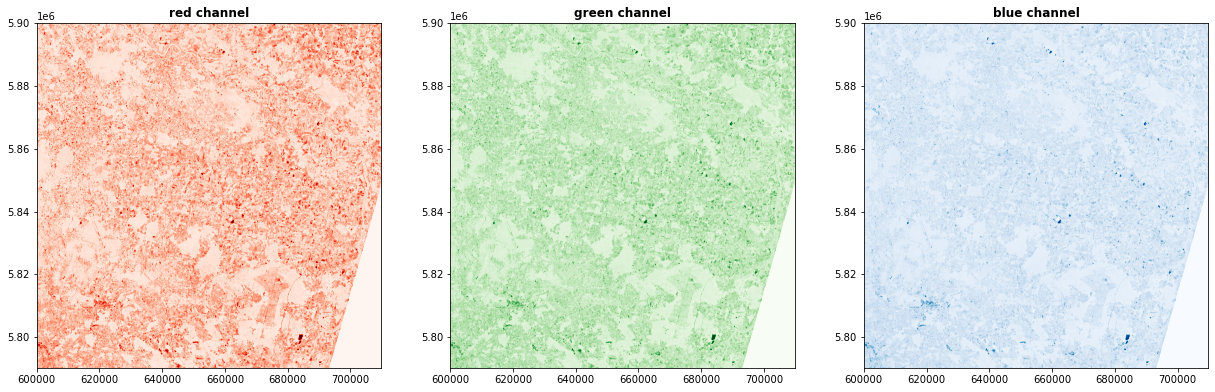

In [37]:
# preview the first downloaded image
with r.open(sentinel_helpers.band_paths(downloaded_paths[3], ['TCI'], '20m')[0]) as true_color:
    # we do not need
    fig, (axr, axg, axb) = plt.subplots(1,3, figsize=(21,7))
    plot.show((true_color, 1), ax=axr, cmap='Reds', title='red channel')
    plot.show((true_color, 2), ax=axg, cmap='Greens', title='green channel')
    plot.show((true_color, 3), ax=axb, cmap='Blues', title='blue channel')
    plt.show()

In [38]:
# plotting the combined rgb image
true_color = r.open(sentinel_helpers.band_paths(downloaded_paths[3], ['TCI'], '20m')[0])

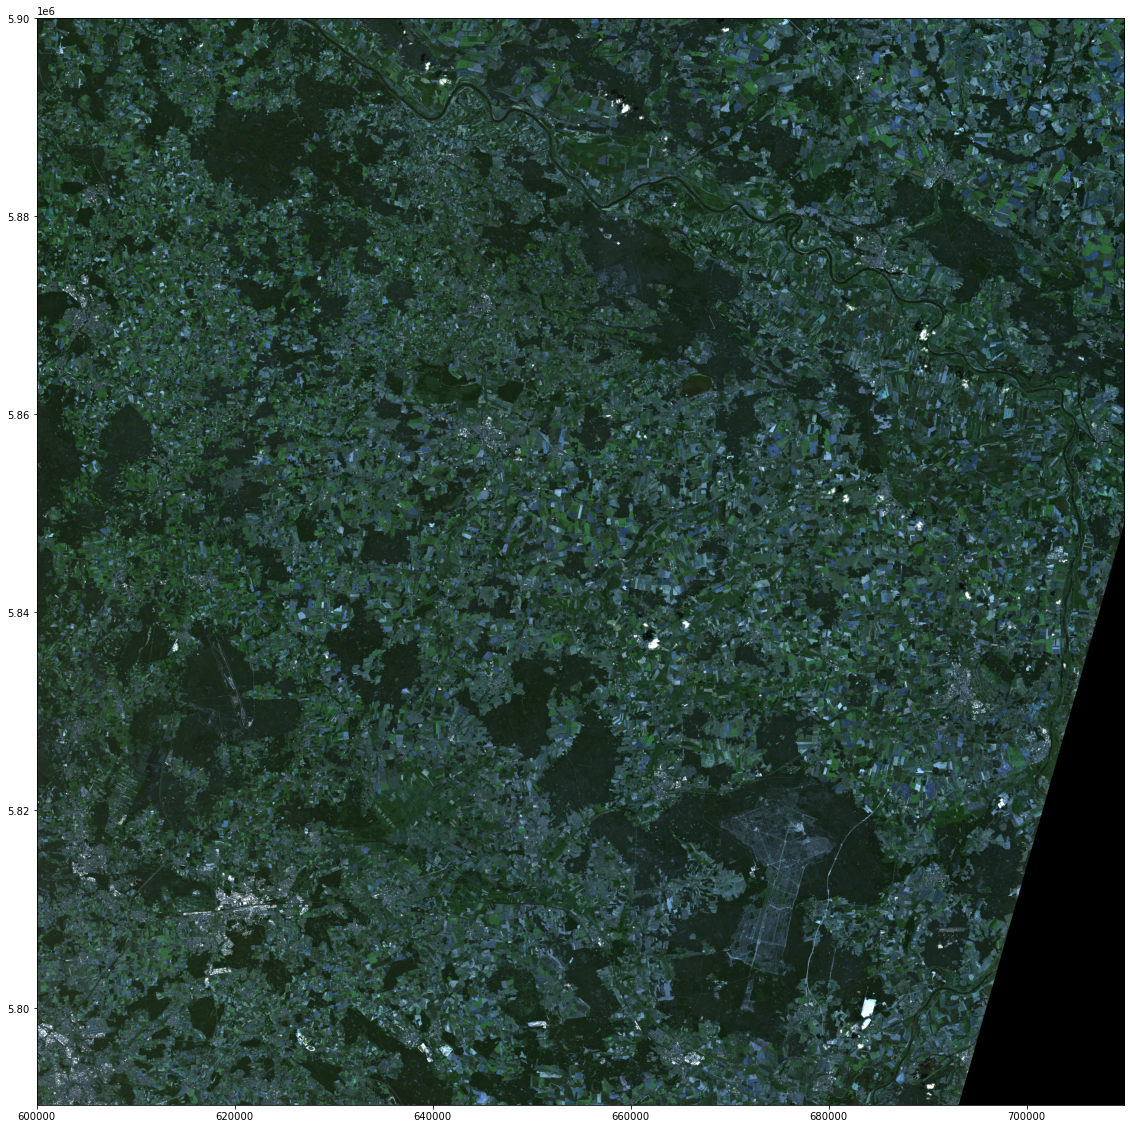

In [39]:
# note that in order to get the real colors, we need to reverse the bands into "rasterio band order"
plt.figure(figsize=(20,20))
plot.show(true_color.read()[::-1], transform=true_color.transform)
plt.show()

## Creating a True-Color Mosaic

In [40]:
from rasterio.merge import merge

In [41]:
# We define a RasterReaderList to read multiple raster files in one with-block;
# TODO: This is documented somewhere in the python docs, we should link to it here

class RasterReaderList():
    def __init__(self, paths):
        self.open_files = []
        self.paths = paths
    
    def __enter__(self):
        for f in self.paths:
            self.open_files.append(r.open(f))
        
        return self.open_files
    
    def __exit__(self, _type, _value, _traceback):
        for f in self.open_files:
            f.close()

In [43]:
# now we need to reproject all tiles to the same projection; for simplicity we take
# the projection that makes us do less work.

from rasterio.warp import calculate_default_transform, reproject, Resampling
from tqdm.notebook import tqdm
from collections import Counter

In [46]:
# if this is set to None the most common crs of the downloaded products is used
target_crs = 'EPSG:25833'

In [47]:
reprojected_rasters = []

In [48]:
with RasterReaderList(band_paths(f, ['TCI'], '20m')[0] for f in downloaded_paths) as to_merge:
    if not target_crs:
        most_common_crs, _ = Counter([str(f.crs) for f in to_merge]).most_common()[0]
        print('The most common CRS is', most_common_crs)
        target_crs = most_common_crs
    
    for src in tqdm(to_merge, desc='Reprojecting raster files…'):
        # only reproject if necessary
        if str(src.meta['crs']) == target_crs:
            reprojected_rasters.append(src)
            continue
        
        # create a temporary file to write the output to
        tmp_output = Path('./tmp/reprojected/') / target_crs / Path(src.name.replace('zip+file://', '').replace('.zip!', ''))
        tmp_path = str(tmp_output).replace(tmp_output.name, '')
        ! mkdir -p {tmp_path}
        
        # print('tmp_path', tmp_path)
        
        # this is mostly taken from https://rasterio.readthedocs.io/en/latest/topics/reproject.html
        transform, width, height = calculate_default_transform(
            src.crs, target_crs, src.width, src.height, *src.bounds)
        
        kwargs = src.meta.copy()
        kwargs.update({
            'crs': target_crs,
            'transform': transform,
            'width': width,
            'height': height
        })
        
        with r.open(tmp_output, 'w', **kwargs) as dst:
            for i in range(1, src.count + 1):
                reproject(
                    source=r.band(src, i),
                    destination=r.band(dst, i),
                    src_transform=src.transform,
                    src_crs=src.crs,
                    dst_transform=transform,
                    dst_crs=target_crs,
                    resampling=Resampling.nearest)
            reprojected_rasters.append(tmp_output)

In [50]:
mosaic, mosaic_transform = merge([r.open(raster) for raster in reprojected_rasters])

In [51]:
mosaic_transform

Affine(19.989581156488008, 0.0, 182274.43537634303,
       0.0, -19.989581156488008, 6008151.625019694)

In [ ]:
fig, (ax) = plt.subplots(1, 1, figsize=(8,16))
plot.show(mosaic, transform=mosaic_transform, ax=ax)
brandenburg.to_crs(target_crs).plot(ax=ax, color='', edgecolor='pink')
plt.show()

/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:146: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  collection = PatchCollection([PolygonPatch(poly) for poly in geoms], **kwargs)


By running `grep VmHWM /proc/$PID/status` we can find out the peak memory consumption of this process.
This memory consumption will not be identical and depend on garbage collector runs and other hard to predict factor.
The number below can therefore only be seen as a rough ballpark estimate:

```
mHWM:	 4876376 kB
```